In [293]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [294]:
df_telecom = pd.read_csv("Customer-Churn.csv") #import telecom dataset into pandas

In [295]:
df_telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [296]:
df_telecom.columns #visualize column names

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [297]:
# check unique values of each column
for column in df_telcom.columns:
    print('column:  {} -  unique   values:    {}'.format(column,df_telecom[column].unique()))

column:  customerID -  unique   values:    ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
column:  gender -  unique   values:    ['Female' 'Male']
column:  SeniorCitizen -  unique   values:    [0 1]
column:  Partner -  unique   values:    ['Yes' 'No']
column:  Dependents -  unique   values:    ['No' 'Yes']
column:  tenure -  unique   values:    [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
column:  PhoneService -  unique   values:    ['No' 'Yes']
column:  MultipleLines -  unique   values:    ['No phone service' 'No' 'Yes']
column:  InternetService -  unique   values:    ['DSL' 'Fiber optic' 'No']
column:  OnlineSecurity -  unique   values:    ['No' 'Yes' 'No internet service']
column:  OnlineBackup -  unique   values:    ['Yes' 'No' 'No internet service']
column:  DevicePro

In [298]:
df_telecom.info() #summary of data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [299]:
df_telecom['TotalCharges'] = pd.to_numeric(df_telecom['TotalCharges'], errors='coerce') #transform the column totalcharges into a numeric data type

In [300]:
df_telecom[df_telecom['TotalCharges'].isnull()] #null values in totalcharges column

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [301]:
df_telecom.dropna(inplace=True) # drop observations with null values

In [302]:
df_telecom.drop(columns='customerID',inplace=True) #drop the customerid column from dataset

In [303]:
df_telecom.PaymentMethod.unique() #unique elements of payment method column

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [304]:
df_telecom['PaymentMethod'] = df_telecom['PaymentMethod'].str.replace(' (automatic)','',regex=False) #remove (automatic) from payment method names

In [305]:
df_telecom.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

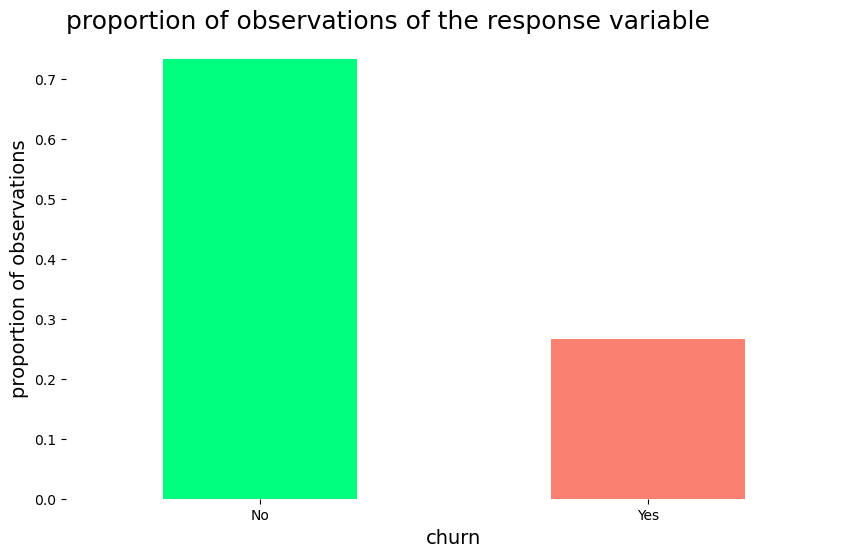

In [306]:
#create figure
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

#proportion of observation of each class
prop_response = df_telecom['Churn'].value_counts(normalize=True)

# create a barplot showing the percentage of churn

prop_response.plot(kind='bar',ax=ax,color=['springgreen','salmon'])

#set title and labels

ax.set_title('proportion of observations of the response variable',fontsize=18, loc='left')

ax.set_xlabel('churn',fontsize=14)

ax.set_ylabel('proportion of observations',fontsize=14)

ax.tick_params(rotation='auto')

#eliminate the frame from the plot
spine_names = ('top','right','bottom','left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

In [307]:
def percentage_stacked_plot(columns_to_plot, super_title):
    
   
    '''
    
    prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
    
    parameters:
               columns_to_plot (list of string): Names of the variable to plot
                
                super_title(string): Super title of the visualization
                    
                    Returns:
                        None
    '''                  
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)
    
    #create a figure
    
    fig = plt.figure(figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22, y=.95)
    
    #loop to each column name to create a subplot
    for index,column in enumerate(columns_to_plot, 1):
        
        #create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        
        #calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        
        prop_by_independent  = pd.crosstab(df_telecom[column], df_telecom['Churn']).apply(lambda x: x/x.sum()*100, axis =1)
        
        prop_by_independent.plot(kind='bar', ax=ax, stacked=True, rot=0, color=['blue','red'])
        
        #set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62,0.5,0.5,0.5),title='Churn',fancybox=True)
        
        #set title and labels
        ax.set_title('Proportion of observations by' +column, fontsize=16, loc='left')
        
        ax.tick_params(rotation='auto')
        
        #eliminate the frame from the plot
        
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
        


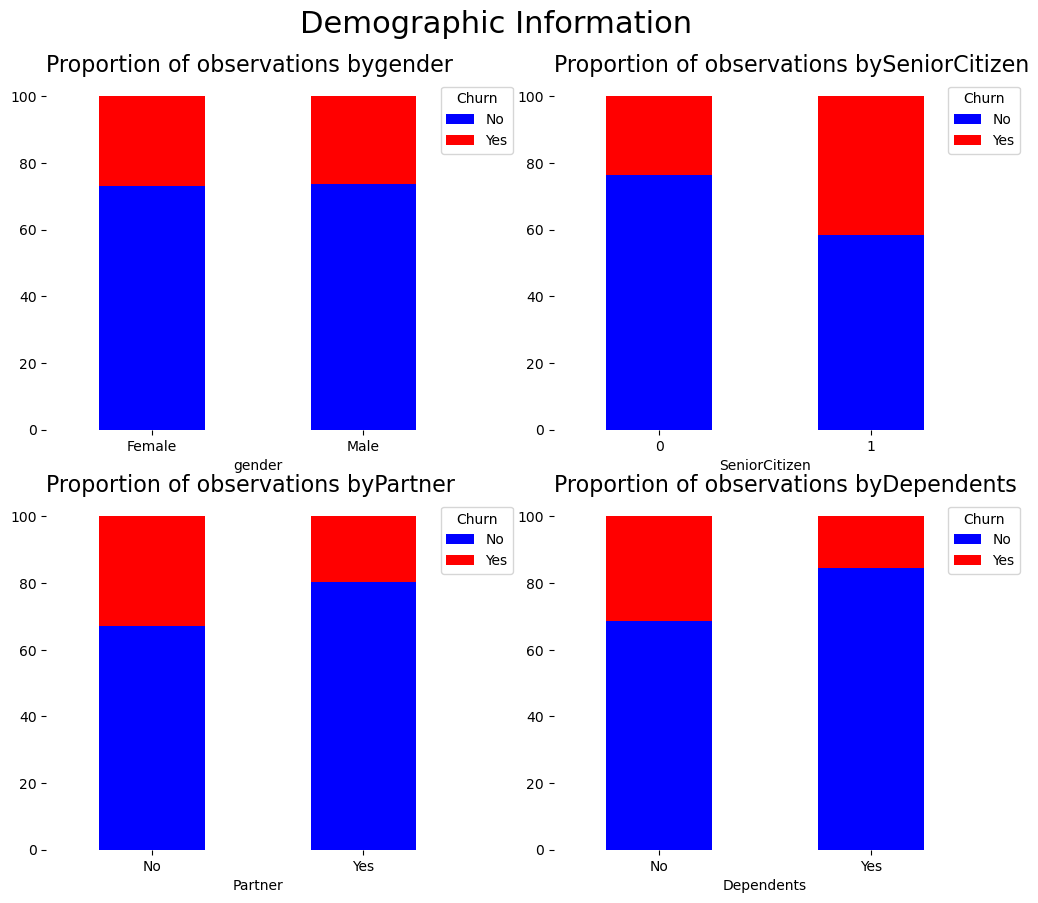

In [308]:
# demographic column names
demographic_columns = ['gender','SeniorCitizen', 'Partner', 'Dependents']

#stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

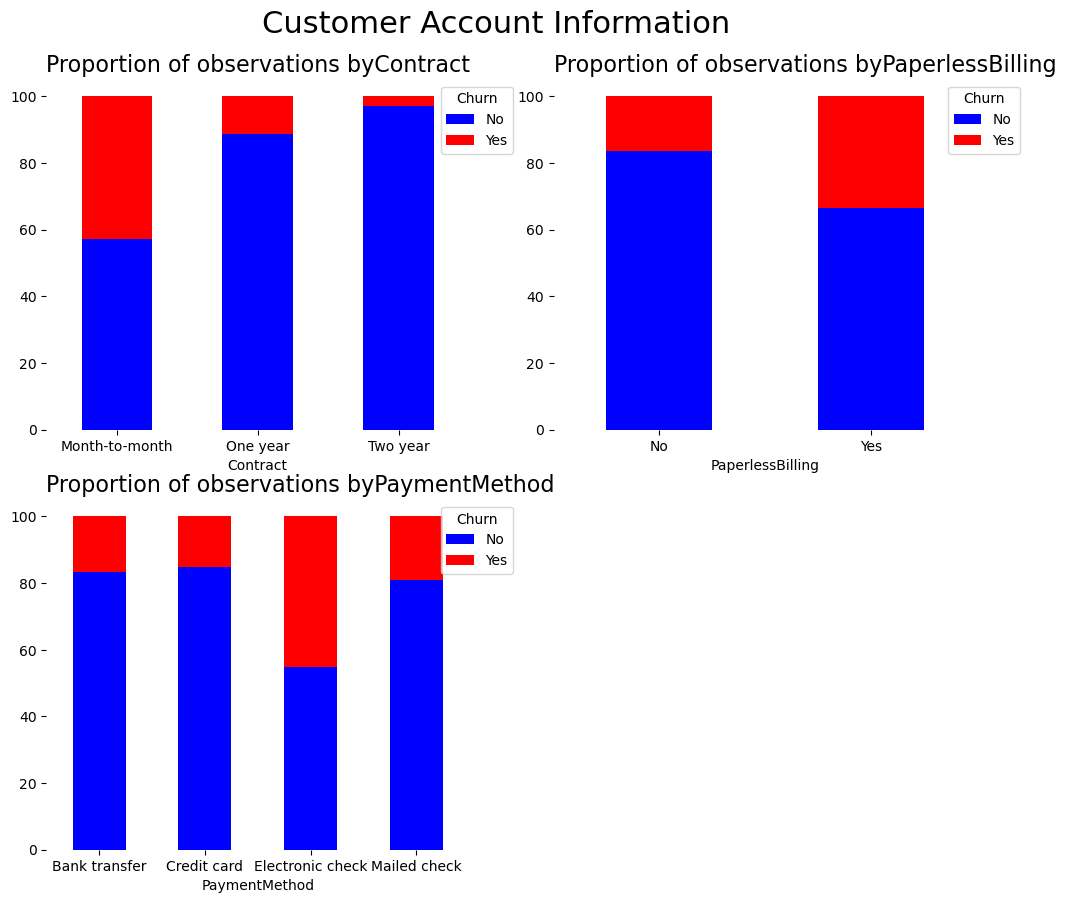

In [309]:
# customer account column names
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information')

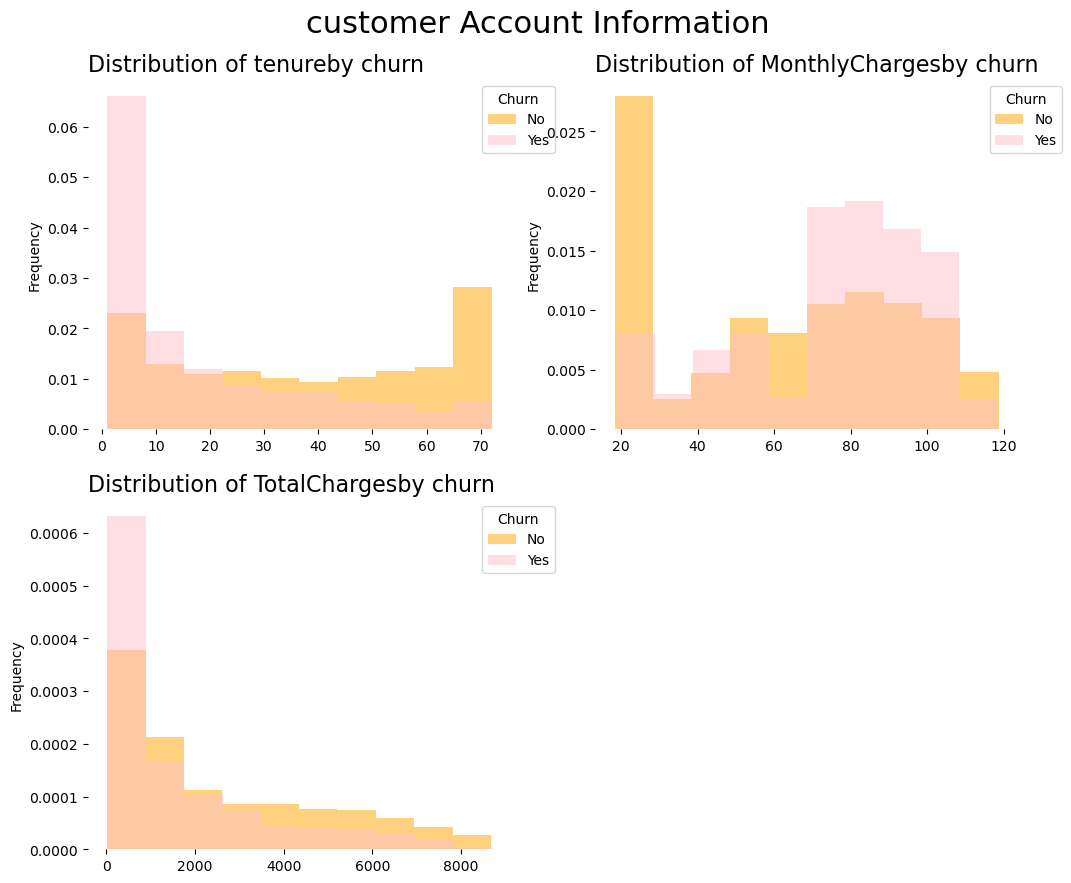

In [310]:
def histogram_plots(columns_to_plot, super_title):
    
   
    '''
    
    prints a histogram for each independent variable of the list columns_to_plot.
    
    parameters:
               columns_to_plot (list of string): Names of the variable to plot
                
                super_title(string): Super title of the visualization
                    
                    Returns:
                        None
    '''                  
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)
    
    #create a figure
    
    fig = plt.figure(figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22, y=.95)
    
    #loop to each demographic column name to create a subplot
    for index,column in enumerate(columns_to_plot, 1):
        
        #create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        
        # histograms for each class (normalized histogram)
        df_telecom[df_telecom['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True,alpha=0.5, color='orange',label='No')
        df_telecom[df_telecom['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,alpha=0.5, color='pink',label='Yes')
     
        #set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62,0.5,0.5,0.5),title='Churn',fancybox=True)
        
        #set title and labels
        ax.set_title('Distribution of ' +column + 'by churn', fontsize=16, loc='left')
        
        ax.tick_params(rotation='auto')
        
        #eliminate the frame from the plot
        
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
                     
                     
# customer account column names

account_columns_numeric = ['tenure','MonthlyCharges', 'TotalCharges']
                     
# histogram of customer account columns

histogram_plots(account_columns_numeric, 'customer Account Information')
                    
        


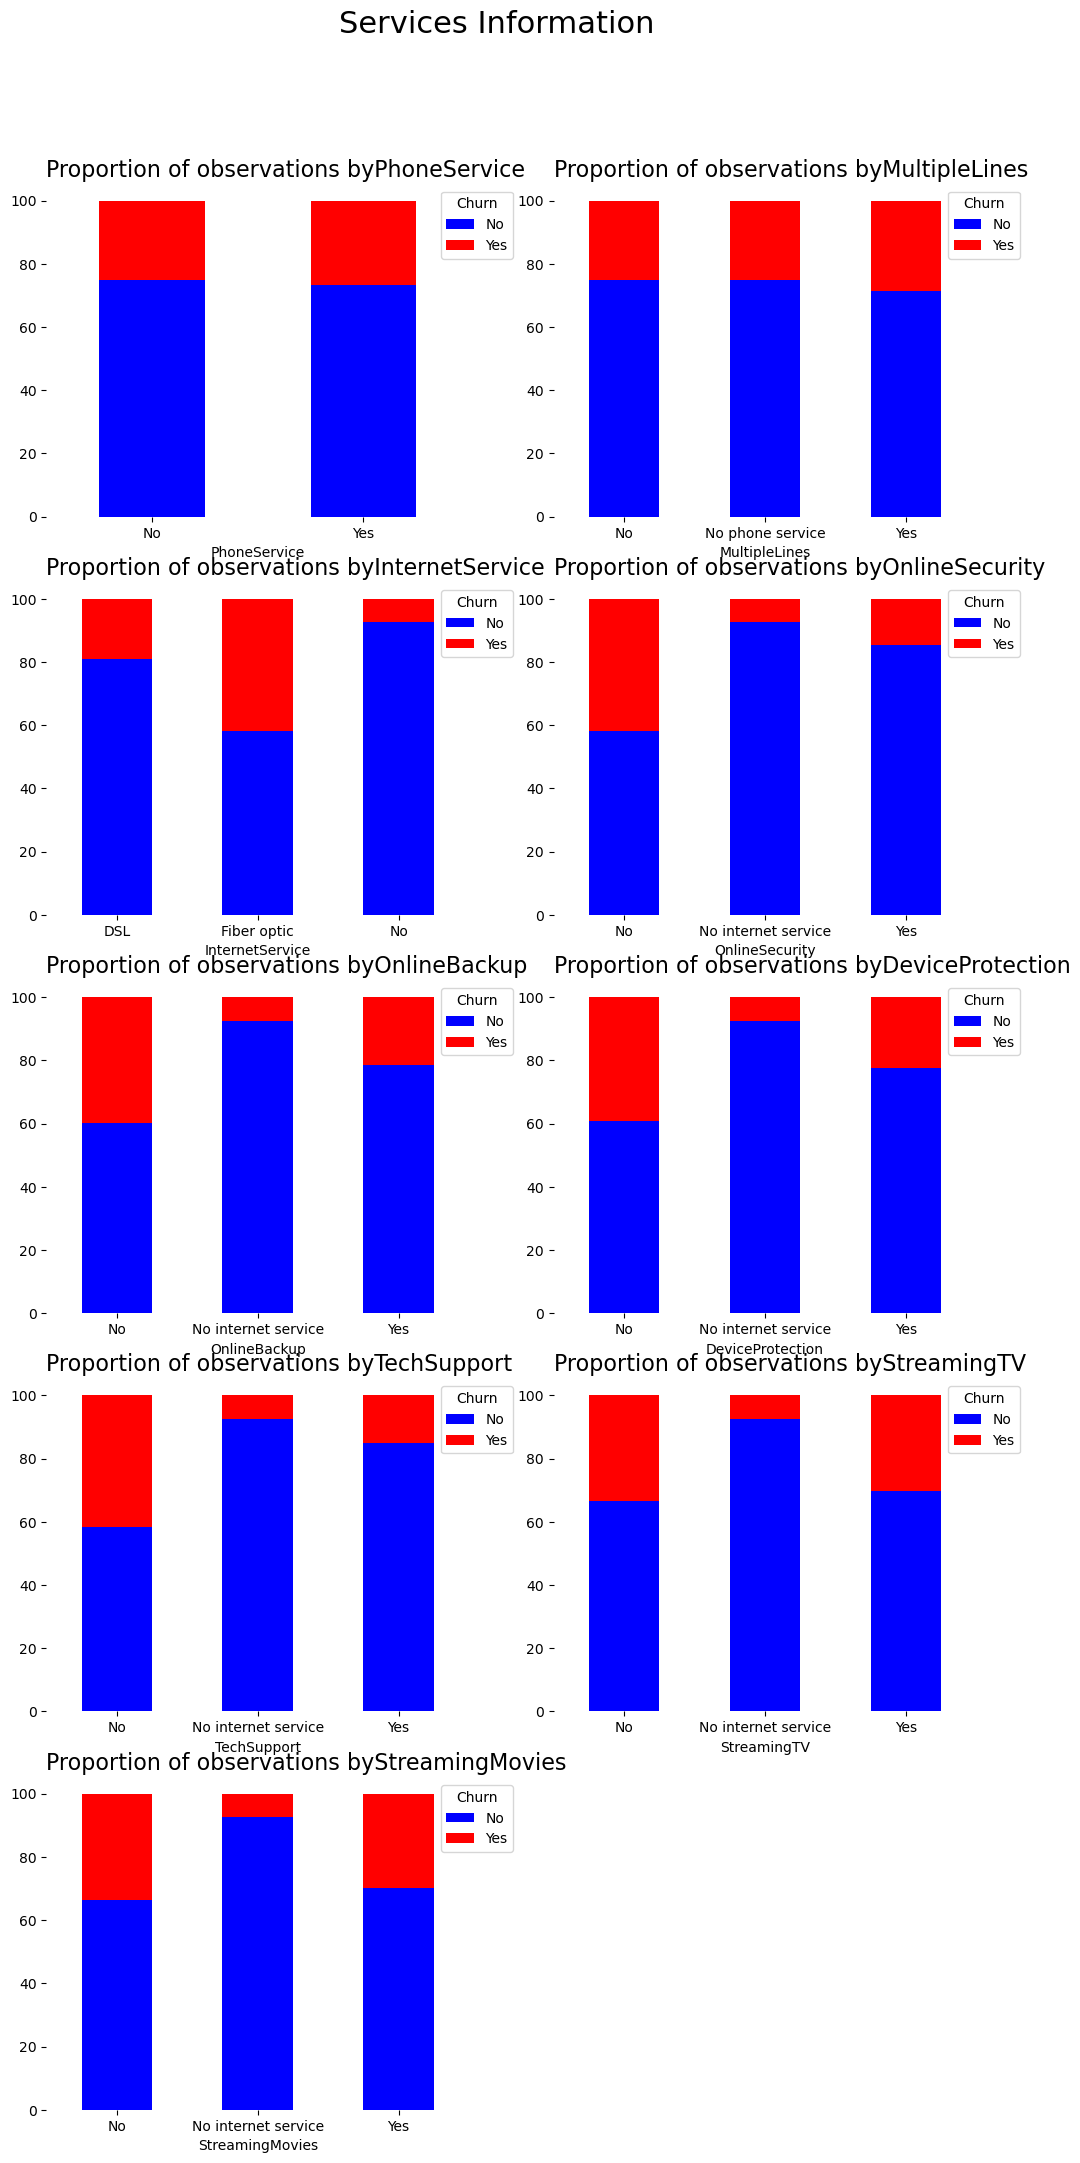

In [311]:
# services column names

services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

# stacked plot of service columns

percentage_stacked_plot(services_columns, 'Services Information')

In [312]:
from sklearn.metrics import mutual_info_score
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df_telecom.Churn)

#select categorical variables excluding the response variable
categorical_variables = df_telecom.select_dtypes(include=object).drop('Churn',axis=1)

#compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

#visualize feature importance
print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


In [313]:
df_telecom_transformed = df_telecom.copy()

# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        df_telecom_transformed[column] = df_telecom_transformed[column].map({'Female': 1, 'Male': 0})
    else:
        df_telecom_transformed[column] = df_telecom_transformed[column].map({'Yes': 1, 'No': 0})

     

In [314]:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
df_telecom_transformed = pd.get_dummies(df_telecom_transformed, columns = one_hot_encoding_columns)


In [315]:
# min-max normalization (numeric variables)
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = df_telecom_transformed[column].min()
        # maximum value of the column
        max_column = df_telecom_transformed[column].max()
        # min max scaler
        df_telecom_transformed[column] = (df_telecom_transformed[column] - min_column) / (max_column - min_column)


In [316]:
# select independent variables
X = df_telecom_transformed.drop(columns='Churn')

# select dependent variables
y = df_telecom_transformed.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'Paym

In [317]:
# split the data in training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=40, shuffle=True)

In [318]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

def create_models(seed=2):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines', svm.SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))

    return models

# create a list with all the algorithms we are going to assess
models = create_models()
     


In [319]:
# test the accuracy of each model using default hyperparameters
from sklearn.metrics import accuracy_score

results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: dummy_classifier, Accuracy: 0.745164960182025)


C:\Users\satvik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\satvik\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Classifier: k_nearest_neighbors, Accuracy: 0.7531285551763367)
Classifier: logistic_regression, Accuracy: 0.7923777019340159)
Classifier: support_vector_machines, Accuracy: 0.7878270762229806)
Classifier: random_forest, Accuracy: 0.7713310580204779)
Classifier: gradient_boosting, Accuracy: 0.7963594994311718)


In [321]:
# define the parameter grid
from sklearn.model_selection import RandomizedSearchCV

grid_parameters = {'n_estimators': [80,90,100,110,115,120],
                   'max_depth':[3,4,5,6],
                   'max_features':[None,'auto','sqrt','log2'],
                'min_samples_split': [2,3,4,5]}

#define the RandomizedSearchCv class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                  param_distributions=grid_parameters,
                                  cv=5,
                                  n_iter=150,
                                  n_jobs=-1)

# fitting the model for random search
random_search.fit(X_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 115, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': 3}


In [322]:
# make the predictions
from sklearn.metrics import confusion_matrix

random_search_predictions = random_search.predict(X_test)

#construct the confusion matrix
confusion_matrix = confusion_matrix(y_test, random_search_predictions)

#visualize the confusion matrix
confusion_matrix

array([[1155,  155],
       [ 196,  252]], dtype=int64)

In [324]:
# print classification report
from sklearn.metrics import classification_report
    
print(classification_report(y_test, random_search_predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1310
           1       0.62      0.56      0.59       448

    accuracy                           0.80      1758
   macro avg       0.74      0.72      0.73      1758
weighted avg       0.79      0.80      0.80      1758



In [325]:
# print the accuracy of the model
accuracy_score(y_test, random_search_predictions)

0.8003412969283277